# **Setting KNN for Comparison with Bayes**

# **Imporing Libraries and Dataset**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import locale
from locale import atof

In [ ]:
data_path = "/content/CPU_benchmark.csv"
ds = pd.read_csv(data_path)

**Filling null with mean method**

In [ ]:
ds=ds.fillna(ds.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


**Checking for null values**

In [ ]:
ds.isnull().sum()

cpuName          0
price            0
cpuMark          0
cpuValue         0
threadMark       0
threadValue      0
TDP              0
powerPerf      685
cores            0
testDate         0
socket           0
category         0
dtype: int64

**Dropping remaining rows with null values**

In [ ]:
ds=ds.dropna()

**Checking Null values again**

In [ ]:
ds.isnull().sum()

cpuName        0
price          0
cpuMark        0
cpuValue       0
threadMark     0
threadValue    0
TDP            0
powerPerf      0
cores          0
testDate       0
socket         0
category       0
dtype: int64

**Removing values with comma to float**

In [ ]:
ds['cpuMark'] = ds['cpuMark'].str.replace(',', '').astype(float)

In [ ]:
ds['threadMark'] = ds['threadMark'].str.replace(',', '').astype(float)

**Checking data**

In [ ]:
ds.head()

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,-0.003119,108822.0,-0.006533,3330.0,-0.001329,4.576987,388.65,10.032118,2022,sWRX8,Desktop
1,AMD EPYC 7763,9.563875,88338.0,-0.831241,2635.0,-1.052480,4.576987,315.49,10.032118,2021,SP3,Server
3,AMD EPYC 7713,9.229110,85861.0,-0.829113,2727.0,-1.050354,3.420250,381.6,10.032118,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,8.877564,83971.0,-0.823084,2626.0,-1.050354,4.576987,299.9,10.032118,2020,sWRX8,Desktop
5,AMD Ryzen Threadripper 3990X,11.097861,81568.0,-0.915999,2569.0,-1.056025,4.576987,291.31,10.032118,2020,sTRX4,Desktop


**Selecting price,cpuMark,TDP and cores**

In [ ]:
ds.iloc[:, [1,2,6,8]]

,price,cpuMark,TDP,cores
0,-0.003119,108822.0,4.576987,10.032118
1,9.563875,88338.0,4.576987,10.032118
3,9.229110,85861.0,3.420250,10.032118
4,8.877564,83971.0,4.576987,10.032118
5,11.097861,81568.0,4.576987,10.032118
...,...,...,...,...
3820,-0.003119,84.0,-0.512657,-0.649182
3821,-0.003119,83.0,-0.161429,-0.649182
3822,-0.003119,81.0,-0.096231,-0.649182
3823,-0.003119,80.0,-1.206699,-0.649182


# **Performing KNN**

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
cols = ['cores','price','cpuValue','threadValue','TDP','threadValue'] 
ds[cols] = sc.fit_transform(ds[cols]) 
X = ds.iloc[:, [1,2,6,8]].values
y = ds.iloc[:, -1].values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'euclidean', p = 1)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test,y_pred)


**Confusion Matrix**

In [ ]:
cm

array([[197,   0,   0,   0,  16,   0,   0,   0,  14,   0,   1],
       [  1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 24,   0,   0,   0, 169,   0,   0,   0,   2,   0,   2],
       [  0,   0,   0,   0,   6,   0,   0,   1,   0,   0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   3,   0,   0,   0,   1,   0,   0],
       [ 45,   0,   0,   0,  14,   0,   0,   0, 107,   0,   3],
       [  0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0],
       [  5,   0,   0,   0,   5,   0,   0,   0,   2,   0,   3]])

**Accuracy Measurement**

In [ ]:
ac

0.7579617834394905

**PLotting Confusion Matrix**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


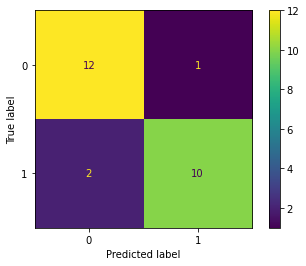

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

## **Setting Bayes**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

**Setting ["price", "TDP", "cores", "cpuMark"] as features and category as target**

In [ ]:
features = ["price", "TDP", "cores", "cpuMark"]
target = "category"

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(ds[features],
ds[target],
test_size = 0.33,
random_state = 54)

In [ ]:
model = GaussianNB()
model.fit(features_train, target_train)

GaussianNB()

In [ ]:
pred = model.predict(features_test)
accuracy = accuracy_score(target_test, pred)

In [ ]:
pred

array(['Laptop', 'Laptop', 'Laptop', ..., 'Laptop', 'Unknown', 'Desktop'],
      dtype='<U32')

**Accuarcy Measurement**

In [ ]:
accuracy

0.5178399228543876

## **Inference**

KNN achieved an accuracy score of:
0.7579617834394905

and Bayes achived an accuarcy score of:
0.5178399228543876